# Demo: Overfitting, Weight-Regularization

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Plot polynomial

Here we plot the polynomial curve $f(x) = 5x^3 + 4x^2 - 2x - 5$.

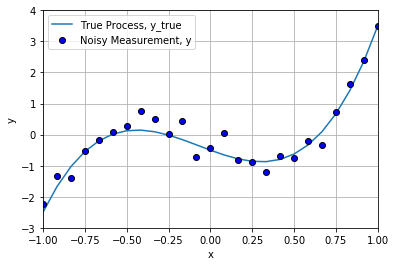

In [1]:
nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [7]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

### Design Matrix

We have the design matrix as $D = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^{M}\\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\ 
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^{M}
\end{bmatrix}$

- Complete the design matrix and set M = 25, the shape of the design matrix should be (15, 26)

In [30]:
# forming the design matrix
# features x, model order M

def design_matrix(x, M):
    # TODO
    
    
    return PhiX


M = 25
Xtrain = design_matrix(xtrain, M)
print(Xtrain.shape)

(15, 26)


Train RMSE = 0.0000
Test RMSE = 379635.5521


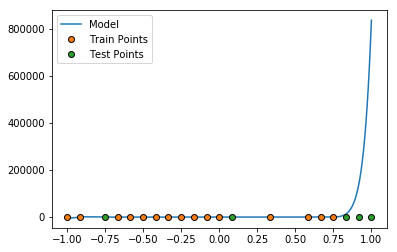

w = 
[[     -0.43]
 [     58.17]
 [   1014.64]
 [   4129.84]
 [  -7343.99]
 [ -71101.83]
 [ -53376.42]
 [ 311221.93]
 [ 409088.34]
 [-473468.89]
 [-647316.23]
 [ 213715.75]
 [-139076.8 ]
 [ -76272.06]
 [ 434758.64]
 [-108030.77]
 [ 349618.2 ]
 [ 155663.64]
 [  42824.64]
 [ 342278.16]
 [-114429.03]
 [ 302289.01]
 [ -44740.58]
 [  73686.61]
 [ 187751.53]
 [-255394.79]]


In [31]:
from sklearn import linear_model

# TODO
# fit the polynomial model using linear regression 


# print the training error RMSE


# print the test error RMSE



# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,4])
plt.legend(['Model','Train Points', 'Test Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

### weight based regularization

- Lasso: L1 norm regularizer $\displaystyle\frac{1}{2n_\mathrm{samples}}\|y - Xw\|^2_2 + \alpha\|w\|_1$


- Ridge: L2 norm regularizer $\displaystyle\|y - Xw\|^2_2 + \alpha\|w\|^2_2$

Train RMSE = 0.3037
Val RMSE = 0.3692


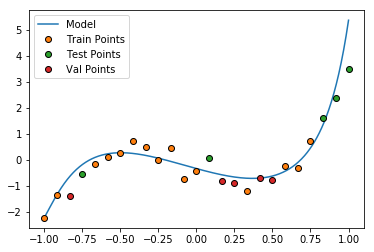

w = 
[[-0.33]
 [-1.6 ]
 [ 0.57]
 [ 2.4 ]
 [ 0.21]
 [ 1.54]
 [ 0.24]
 [ 0.8 ]
 [ 0.23]
 [ 0.4 ]
 [ 0.19]
 [ 0.19]
 [ 0.14]
 [ 0.09]
 [ 0.1 ]
 [ 0.03]
 [ 0.07]
 [ 0.01]
 [ 0.05]
 [-0.01]
 [ 0.04]
 [-0.01]
 [ 0.03]
 [-0.02]
 [ 0.03]
 [-0.02]]


In [20]:
# TODO

# Using the following models to fit the data
# reg = linear_model.Lasso(alpha=.02, fit_intercept=False)
# reg = linear_model.Ridge(alpha=.05, fit_intercept=False)


# print the training error RMSE


# print the validation error RMSE


# print the testing error RMSE


# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))